<a href="https://colab.research.google.com/github/lsmanoel/CEM_4/blob/master/out_2d_open_matrix_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSV from Github:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
#@CSV from Github
import numpy as np
import pandas as pd
from matplotlib.ticker import IndexFormatter

url_elc_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv'
url_elc_plane_bottom_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv'
url_elc_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv'
url_elc_plane_top_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv'
url_mag_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv'
url_mag_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv'

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
rows_name = np.arange(1,14,1).tolist()
xticks_formatter = IndexFormatter(columns_name)
yticks_formatter = IndexFormatter(rows_name)

pd_elc_plane_bottom_24_MHz = pd.read_csv(url_elc_plane_bottom_24_MHz, names=columns_name)
pd_elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz[pd_elc_plane_bottom_24_MHz.columns[::-1]]
pd_elc_plane_bottom_500_KHz = pd.read_csv(url_elc_plane_bottom_500_KHz, names=columns_name)
pd_elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz[pd_elc_plane_bottom_500_KHz.columns[::-1]]
pd_mag_plane_bottom_24_MHz = pd.read_csv(url_mag_plane_bottom_24_MHz, names=columns_name)
pd_mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz[pd_mag_plane_bottom_24_MHz.columns[::-1]]

pd_elc_plane_top_24_MHz = pd.read_csv(url_elc_plane_top_24_MHz, names=columns_name)
pd_elc_plane_top_500_KHz = pd.read_csv(url_elc_plane_top_500_KHz, names=columns_name)
pd_mag_plane_top_24_MHz = pd.read_csv(url_mag_plane_top_24_MHz, names=columns_name)

elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz.values
elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz.values
elc_plane_top_24_MHz = pd_elc_plane_top_24_MHz.values
elc_plane_top_500_KHz = pd_elc_plane_top_500_KHz.values
mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz.values
mag_plane_top_24_MHz = pd_mag_plane_top_24_MHz.values

elc_plane_bottom_24_MHz = -elc_plane_bottom_24_MHz
elc_plane_bottom_500_KHz = -elc_plane_bottom_500_KHz
elc_plane_top_24_MHz = -elc_plane_top_24_MHz
elc_plane_top_500_KHz = -elc_plane_top_500_KHz
mag_plane_bottom_24_MHz = -mag_plane_bottom_24_MHz
mag_plane_top_24_MHz = -mag_plane_top_24_MHz


---
##  Plot 2d: Global Config

In [0]:
cube_range = (0, 13)

figure_size = (18,8)
plot_layout = (1, 2)

gap_layout = (5.5,1,1,9) # (Posição_inicial_X, Posição_inicial_Y, Largura, Altura).

##  Plot 2d: Global Config - Elétrico

In [0]:
elc_global_scale = (10, -60)
elc_private_scale = ((
    np.max(np.array([*elc_plane_bottom_24_MHz,
                     *elc_plane_bottom_500_KHz,
                     *elc_plane_top_24_MHz,
                     *elc_plane_top_500_KHz])), 
    np.min(np.array([*elc_plane_bottom_24_MHz,
                     *elc_plane_bottom_500_KHz,
                     *elc_plane_top_24_MHz,
                     *elc_plane_top_500_KHz])))
)

elc_cube_range = cube_range

elc_figure_size = figure_size
elc_plot_layout = plot_layout

##  Plot 2d: Global Config - Magnético

In [0]:
mag_global_scale = (10, -60)
mag_private_scale = ((
    np.max(np.array([*mag_plane_bottom_24_MHz,
                     *mag_plane_top_24_MHz])), 
    np.min(np.array([*mag_plane_bottom_24_MHz,
                     *mag_plane_top_24_MHz])))
)

mag_cube_range = cube_range

mag_figure_size = figure_size
mag_plot_layout = plot_layout

---
##  Plot 2d: Top - 500  KHz - Elétrico

In [5]:
pd_elc_plane_top_500_KHz

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,36.53,33.46,29.64,27.03,24.70,21.67,18.91,20.77,23.51,25.19,26.80,29.52,32.25
1,37.73,31.22,17.31,14.44,13.50,12.55,5.02,11.38,12.58,12.66,13.17,21.06,29.19
2,38.82,28.42,10.10,9.02,8.50,8.50,4.42,8.32,8.91,8.88,5.09,12.53,25.08
3,40.70,37.24,30.40,27.91,27.22,25.63,20.66,24.68,26.59,25.36,10.67,11.40,24.52
4,43.50,43.25,41.06,38.83,38.13,36.23,33.06,35.40,35.83,30.52,11.68,11.10,24.16
5,44.56,44.12,46.30,45.54,44.27,42.77,40.85,41.22,39.51,32.42,11.14,10.58,24.40
6,47.30,49.99,50.17,50.17,49.79,48.30,46.68,46.07,42.43,32.90,12.01,10.20,23.88
7,47.50,50.00,50.00,50.00,50.00,49.50,47.30,46.20,42.50,33.16,11.72,10.60,24.23
8,48.35,50.77,51.68,51.53,51.30,50.40,48.80,47.56,42.94,34.17,11.21,10.45,24.28
9,48.16,50.00,50.50,50.30,50.50,50.20,49.28,47.63,43.25,34.29,11.57,10.20,23.68


In [0]:
Z = elc_plane_top_500_KHz

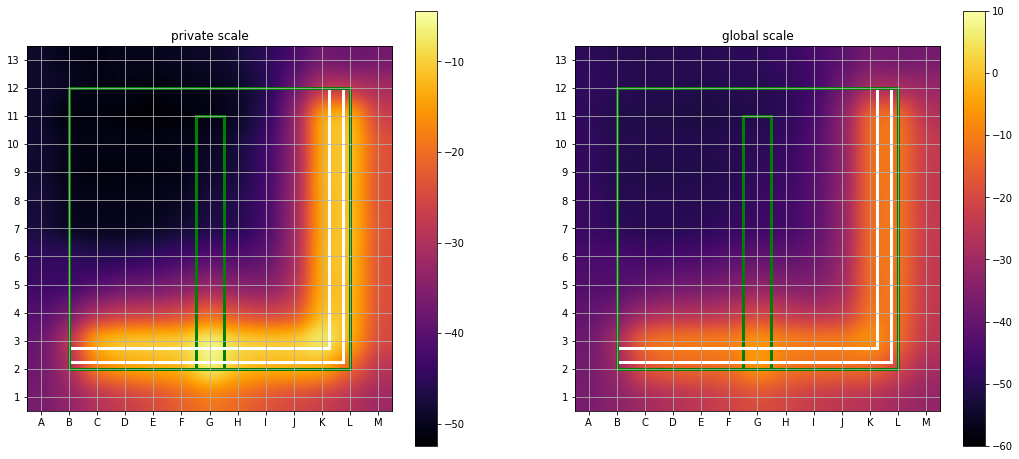

In [7]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)
  
# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)
  
#===============================================================================
plt.show()


---
##  Plot 2d: Bottom - 500  KHz  - Elétrico

In [8]:
pd_elc_plane_bottom_500_KHz

,M,L,K,J,I,H,G,F,E,D,C,B,A
0,26.82,23.82,20.32,18.08,17.04,15.50,14.25,15.45,17.03,17.08,19.43,21.58,23.12
1,27.60,25.85,23.49,20.20,19.42,15.85,5.15,15.62,19.35,19.84,20.22,21.85,21.96
2,28.41,26.79,30.32,28.44,27.66,21.38,6.81,22.02,28.42,28.95,28.98,25.59,20.88
3,29.72,33.97,36.31,36.25,34.88,29.94,22.11,31.19,35.60,35.85,35.00,26.70,20.27
4,32.00,35.96,36.22,37.50,36.00,35.19,31.00,34.97,36.27,35.34,34.83,28.99,19.93
5,32.68,35.58,38.19,38.40,37.43,37.04,36.02,37.04,37.19,37.43,35.11,28.38,19.66
6,33.01,36.30,37.46,38.14,37.91,38.00,37.68,38.00,37.18,37.61,35.93,27.72,19.91
7,32.92,35.14,37.57,36.95,37.60,37.05,38.04,38.06,38.16,37.07,35.61,26.94,19.60
8,32.97,35.70,37.88,37.15,37.14,37.50,36.97,37.68,37.11,36.24,35.68,26.12,19.68
9,33.08,34.52,37.40,37.40,37.80,37.02,37.70,37.68,37.86,36.50,35.28,26.79,19.82


In [0]:
Z = elc_plane_bottom_500_KHz

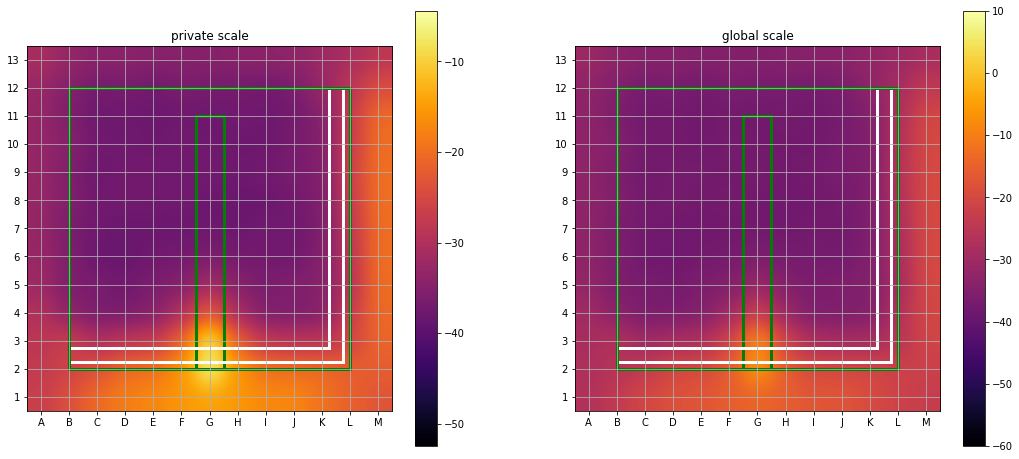

In [10]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

#===============================================================================
plt.show()


---
##  Plot 2d: Top - 24  MHz  - Elétrico

In [11]:
pd_elc_plane_top_24_MHz

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,45.49,38.80,34.67,31.64,29.13,25.27,22.65,24.43,27.22,29.87,32.18,35.44,39.13
1,50.20,41.42,20.75,17.54,16.95,16.11,7.26,14.39,15.64,15.50,15.84,25.06,35.37
2,47.49,32.67,12.95,11.30,11.52,11.32,6.39,10.47,11.35,10.47,7.20,13.32,30.60
3,45.99,39.16,40.95,37.55,36.23,34.34,25.46,30.93,33.33,31.00,12.25,13.91,28.88
4,43.20,36.05,34.38,35.16,35.59,36.37,52.13,38.17,36.99,38.69,12.27,14.93,28.85
5,43.18,35.46,34.34,34.18,34.03,34.88,38.08,36.34,36.18,39.86,16.01,13.72,28.90
6,42.84,35.70,34.08,33.81,33.68,34.59,36.81,35.69,35.46,40.57,14.08,14.28,29.25
7,42.28,35.69,34.46,34.46,34.31,34.57,37.26,36.24,36.73,41.90,12.70,14.28,29.77
8,42.74,35.99,34.90,34.90,34.90,34.97,37.35,36.23,36.90,43.34,13.50,13.04,28.99
9,41.76,36.37,34.80,34.80,34.88,34.95,36.73,36.15,36.79,43.16,15.89,15.06,28.16


In [0]:
 Z = elc_plane_top_24_MHz

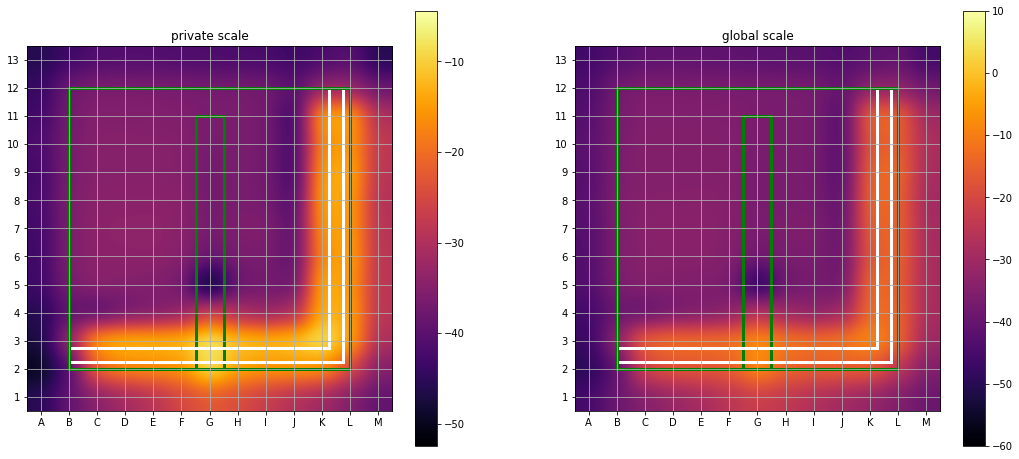

In [13]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)
#===============================================================================
plt.show()


---
##  Plot 2d: Bottom - 24  MHz  - Elétrico

In [14]:
pd_elc_plane_bottom_24_MHz

,M,L,K,J,I,H,G,F,E,D,C,B,A
0,37.08,31.90,26.52,23.61,22.05,19.95,18.67,19.88,21.98,22.96,24.49,27.88,31.15
1,40.37,38.61,36.65,30.02,28.84,21.10,7.68,21.23,27.60,28.10,28.83,31.64,28.52
2,46.02,26.21,30.57,31.18,32.53,32.54,9.57,34.78,33.76,33.17,33.39,38.78,27.17
3,44.45,29.59,29.92,30.48,30.24,33.00,29.92,33.58,31.77,32.03,32.13,38.25,26.60
4,41.10,31.58,30.24,30.49,29.54,30.41,38.67,32.75,32.13,32.13,32.54,39.45,26.49
5,39.57,31.38,30.50,30.38,30.21,31.00,34.29,32.54,31.87,31.81,32.20,38.97,26.38
6,39.10,31.52,30.55,30.68,30.10,31.00,33.52,32.10,31.36,31.70,31.83,39.30,26.73
7,40.03,31.80,30.42,30.80,30.32,30.59,33.36,32.03,31.64,31.38,31.67,40.54,26.60
8,40.05,32.03,31.08,31.46,31.70,31.15,34.38,32.43,32.65,32.86,33.39,41.71,26.38
9,39.87,31.30,31.58,31.61,31.52,31.71,34.35,33.87,32.88,33.00,33.72,43.26,26.52


In [0]:
Z = elc_plane_bottom_24_MHz

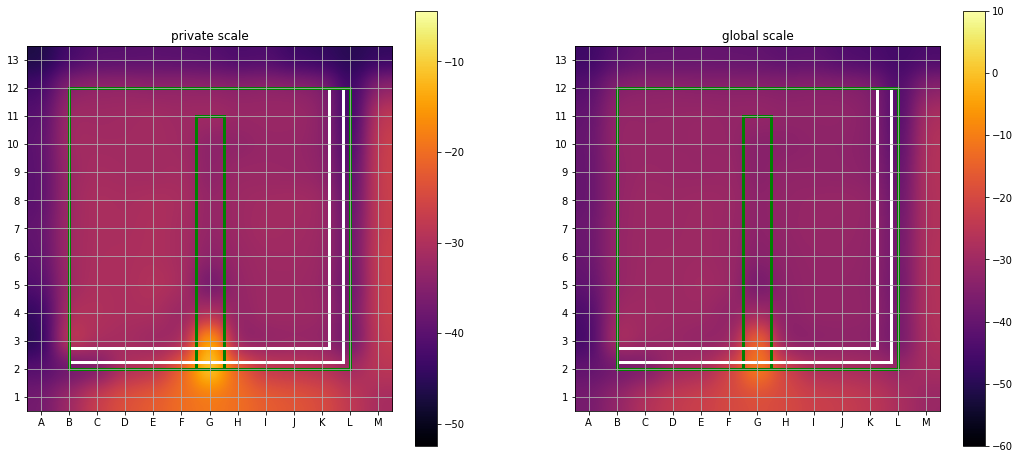

In [16]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

#===============================================================================
plt.show()


---
##  Plot 2d: Top - 24  MHz  - Magnético

In [17]:
pd_mag_plane_top_24_MHz

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,45.90,42.60,38.80,35.56,33.00,32.20,31.50,31.30,31.90,35.40,37.00,41.50,45.36
1,40.57,37.40,33.50,30.46,29.23,27.34,26.30,26.50,27.50,29.25,31.90,33.50,40.70
2,36.53,34.52,31.18,28.65,27.03,25.81,25.98,25.60,25.40,26.60,27.85,30.41,35.42
3,36.44,33.57,30.96,29.52,27.76,27.24,30.13,28.41,28.39,27.89,28.73,28.01,32.46
4,35.17,32.00,29.77,28.49,27.26,29.40,34.60,32.26,28.60,30.80,28.39,28.62,33.80
5,35.62,32.30,29.62,27.79,27.26,30.16,38.50,32.13,30.16,29.42,27.98,27.91,33.00
6,35.18,32.70,29.97,28.39,27.31,29.62,38.56,33.10,29.27,29.54,27.98,29.53,33.00
7,36.80,32.25,30.08,28.26,27.14,29.40,35.16,30.97,29.47,29.25,29.36,29.81,33.78
8,36.64,36.66,30.77,28.68,27.37,28.36,31.84,30.26,28.39,28.16,28.11,28.01,35.87
9,38.33,34.38,31.54,29.25,27.55,27.17,28.49,26.73,27.40,28.54,28.29,30.76,37.27


In [0]:
Z = mag_plane_top_24_MHz

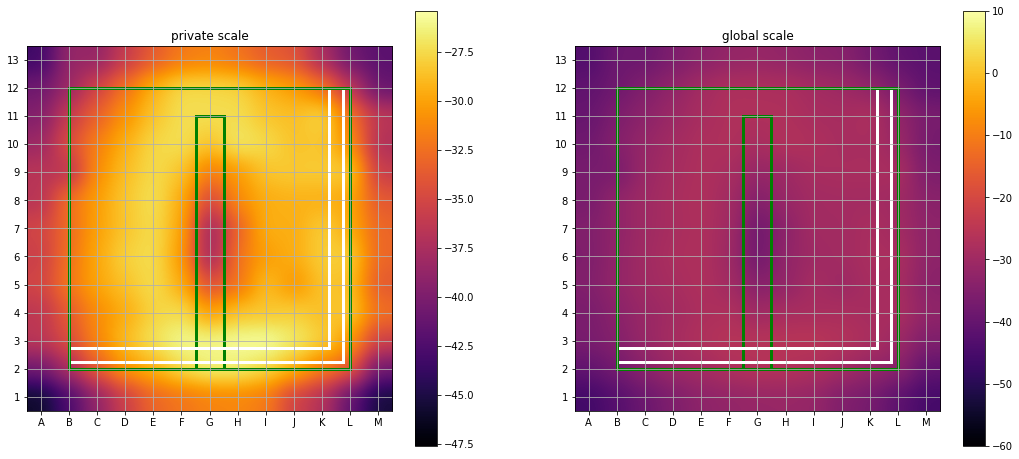

In [19]:
Z = Z[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=mag_figure_size)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_private_scale[0],
                vmin = mag_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

ax.grid(True)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_global_scale[0],
                vmin = mag_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

ax.grid(True)

#===============================================================================
plt.show()


---
##  Plot 2d: Bottom - 24  MHz Magnético

In [20]:
pd_mag_plane_bottom_24_MHz

,M,L,K,J,I,H,G,F,E,D,C,B,A
0,43.66,40.41,38.12,35.54,33.66,31.62,31.25,31.33,33.19,35.39,37.67,39.90,43.02
1,41.02,35.63,33.17,31.71,32.44,30.68,28.97,28.87,30.49,32.52,34.78,37.23,39.93
2,40.03,35.81,33.91,31.93,29.30,27.91,27.64,27.89,29.16,31.16,33.17,35.77,38.26
3,39.40,34.90,31.62,29.50,27.90,27.11,32.20,28.18,28.76,30.32,32.10,33.60,36.24
4,38.40,33.20,31.00,29.09,27.20,27.40,34.30,30.00,28.70,29.69,31.74,33.76,35.60
5,37.15,33.50,30.80,28.94,27.86,28.87,42.60,30.30,27.64,28.52,30.26,32.50,34.83
6,36.96,33.50,31.16,28.70,28.13,29.10,47.60,31.16,28.13,28.65,30.55,32.65,34.76
7,37.80,33.50,30.11,28.50,27.50,28.49,39.90,29.80,27.30,28.70,30.59,32.97,35.20
8,37.50,33.40,30.60,28.83,27.50,27.50,34.15,29.15,27.80,29.14,31.20,33.15,35.70
9,39.10,34.60,31.80,29.70,27.50,27.17,29.50,25.70,27.50,29.80,31.70,34.20,37.50


In [0]:
Z = mag_plane_bottom_24_MHz

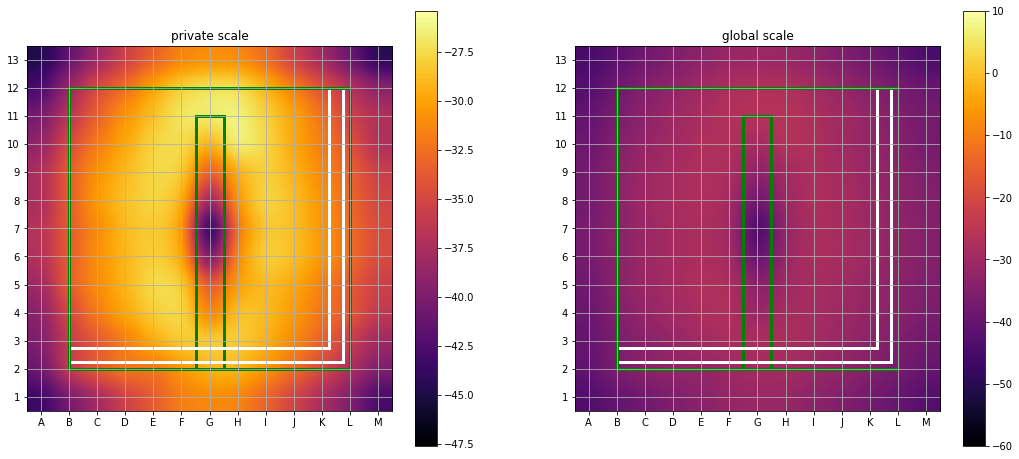

In [22]:
Z = Z[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=mag_figure_size)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_private_scale[0],
                vmin = mag_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_global_scale[0],
                vmin = mag_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

#===============================================================================
plt.show()
